<a href="https://colab.research.google.com/github/kitkit922/Machine_Learning_1/blob/main/Assignment3_TszKitCheung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Tsz Kit Cheung (Kevin) N01555831 Assignment 3

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Tsz Kit Cheung N01555831 ITE 5310 Assignment 3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/L4/Mall_Customers.csv')

In [4]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
x = data[['Annual Income (k$)','Spending Score (1-100)']].to_numpy()

#Perform Hierarchical clustering on the dataset using google collab Notebook for Python.

In [6]:
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage

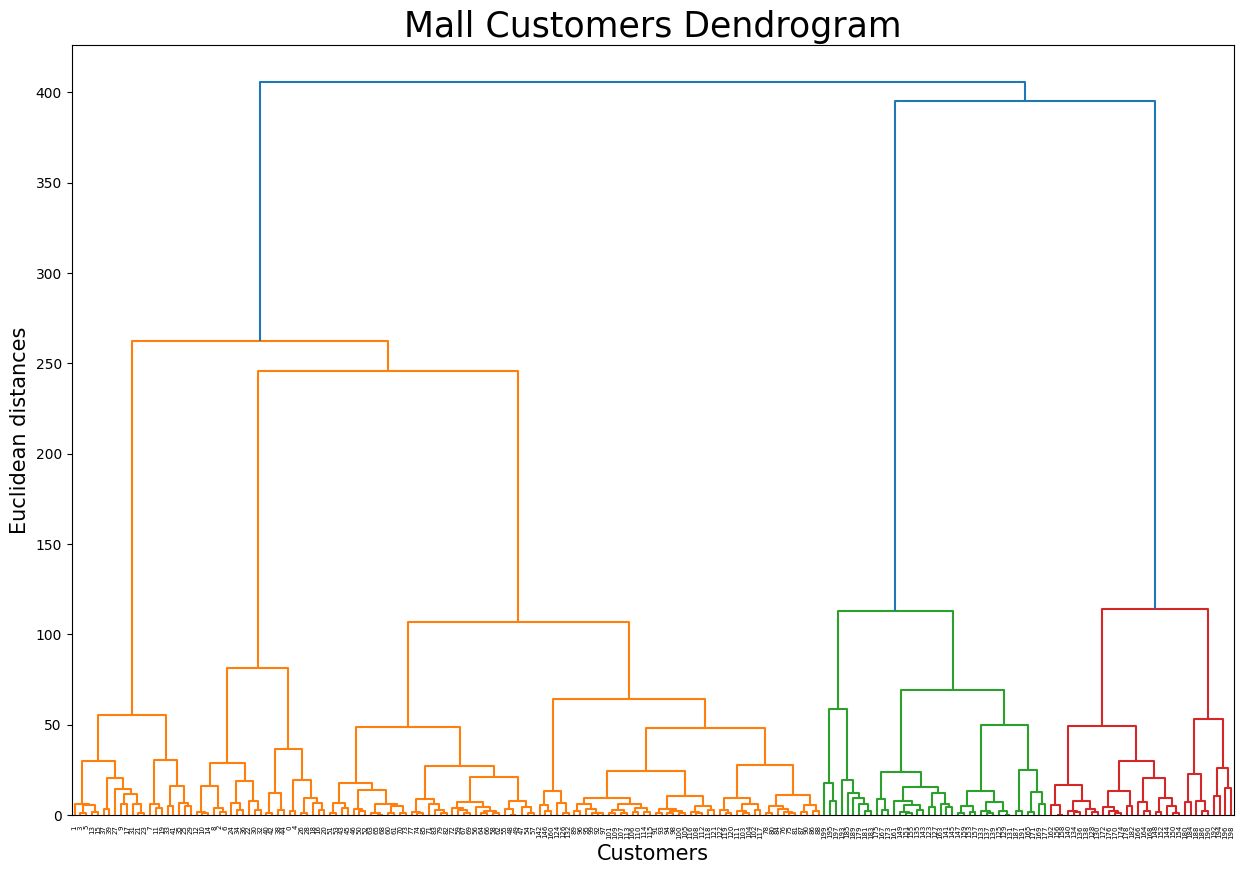

In [7]:
plt.figure(figsize = (15,10))

linkage_data = linkage(x, method='ward', metric='euclidean') #default method for dendrogram
Dendrogram = dendrogram(linkage_data)

plt.title('Mall Customers Dendrogram', fontsize = 25)
plt.xlabel('Customers', fontsize = 15)
plt.ylabel('Euclidean distances',fontsize = 15)
plt.show()

# From Dendrogram, I assume number of clusters is 3

In [8]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3)
y_hie_pred = hc.fit_predict(x)

[(0.2, 0.4, 0.6), (0.8, 0.1, 0.3), (0.5, 0.7, 0.2), (0.9, 0.5, 0.1), (0.3, 0.6, 0.9), (0.7, 0.2, 0.8), (0.1, 0.9, 0.4), (0.4, 0.8, 0.7), (0.6, 0.3, 0.5), (0.2, 0.5, 0.8)]


<ipython-input-9-2ba771dd609e>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x[y_hie_pred == i, 0], x[y_hie_pred == i, 1], s = 100, c = colorArray[i], label = f'Cluster {i+1}')


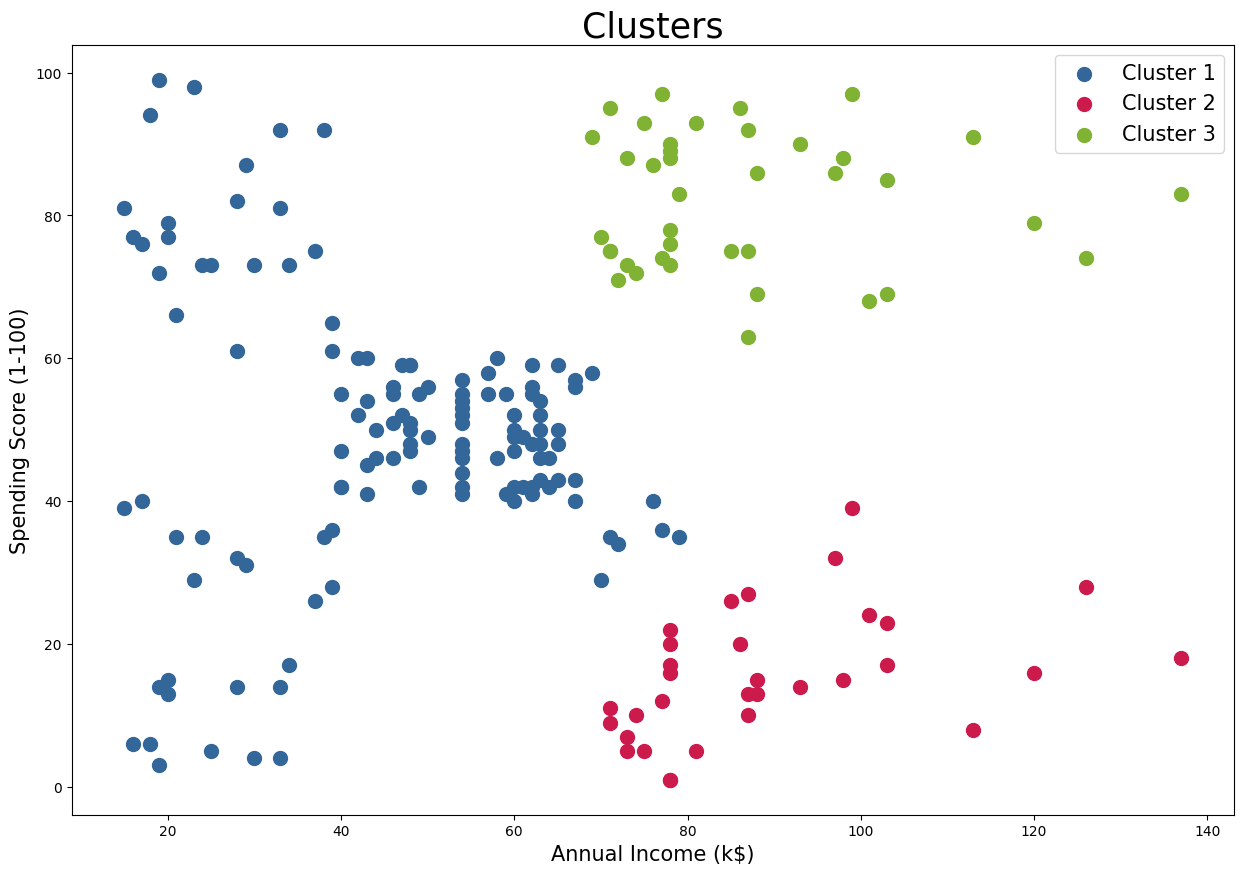

In [9]:
plt.figure(figsize = (15,10))
colorArray = [
    (0.2, 0.4, 0.6),
    (0.8, 0.1, 0.3),
    (0.5, 0.7, 0.2),
    (0.9, 0.5, 0.1),
    (0.3, 0.6, 0.9),
    (0.7, 0.2, 0.8),
    (0.1, 0.9, 0.4),
    (0.4, 0.8, 0.7),
    (0.6, 0.3, 0.5),
    (0.2, 0.5, 0.8)
]

# Print the extended colorArray
print(colorArray)


for i in range(3):
  plt.scatter(x[y_hie_pred == i, 0], x[y_hie_pred == i, 1], s = 100, c = colorArray[i], label = f'Cluster {i+1}')

plt.title('Clusters', fontsize = 25)
plt.xlabel('Annual Income (k$)', fontsize = 15)
plt.ylabel('Spending Score (1-100)', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()







#Evaluate clustering performance using CH-Index and Silhouette score. (For 2 - 10 clusters)


In [10]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [11]:
CHlist = []
SSlist = []

max_ch = 0
max_ss = 0
max_ch_n = 0
max_ss_n = 0



for i in range (2,11):
  hc = AgglomerativeClustering(n_clusters = i)
  y_pred = hc.fit_predict(x)

  # calinski_harabasz_score
  chscore = calinski_harabasz_score(x, y_pred)
  CHlist.append(chscore)
  print(f'Calinski Harabasz Score(n = {i}) : {chscore}')

  # silhouette_score
  ssscore = silhouette_score(x, y_pred)
  SSlist.append(ssscore)
  print(f'Silhouette Score(n = {i}) : {ssscore}')
  print('')

#find Calinski Harabasz Score max
for i, element in enumerate(CHlist):
  if element > max_ch:
    max_ch = element
    max_ch_n = i
print(f'Max Calinski Harabasz Score: (n = {max_ch_n + 2}) : {max_ch}')

#find Silhouette Score max
for i, element in enumerate(SSlist):
  if element > max_ss:
    max_ss = element
    max_ss_n = i
print(f'Max Silhouette Score: (n = {max_ss_n + 2}) : {max_ss}')


Calinski Harabasz Score(n = 2) : 86.79455894460492
Silhouette Score(n = 2) : 0.36706444723912895

Calinski Harabasz Score(n = 3) : 143.81953140807286
Silhouette Score(n = 3) : 0.4618340266628975

Calinski Harabasz Score(n = 4) : 168.99240689146274
Silhouette Score(n = 4) : 0.4916598193892782

Calinski Harabasz Score(n = 5) : 243.07142892964563
Silhouette Score(n = 5) : 0.5529945955148897

Calinski Harabasz Score(n = 6) : 232.46420120838107
Silhouette Score(n = 6) : 0.5380208285578872

Calinski Harabasz Score(n = 7) : 237.09590414133663
Silhouette Score(n = 7) : 0.519904611908887

Calinski Harabasz Score(n = 8) : 251.32552800907388
Silhouette Score(n = 8) : 0.4326286245782246

Calinski Harabasz Score(n = 9) : 253.12189442941394
Silhouette Score(n = 9) : 0.43892545672004507

Calinski Harabasz Score(n = 10) : 252.20438539491536
Silhouette Score(n = 10) : 0.4342656377895271

Max Calinski Harabasz Score: (n = 9) : 253.12189442941394
Max Silhouette Score: (n = 5) : 0.5529945955148897


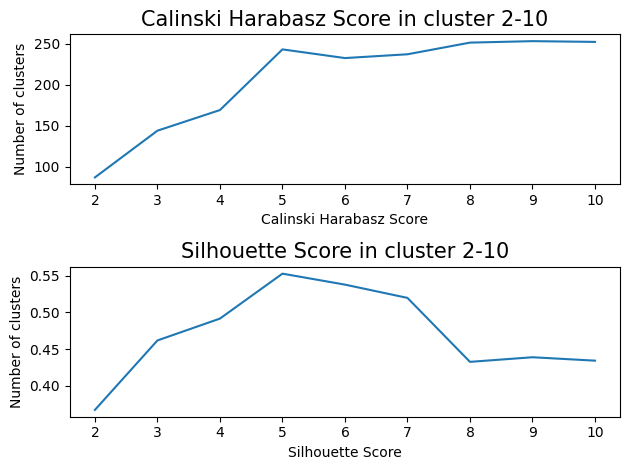

In [12]:
# Plot the graph of Calinski Harabasz Score and Silhouette Score
x_axis = range(2,11)
plt.subplot(2,1,1)
plt.plot(x_axis,CHlist)
plt.title("Calinski Harabasz Score in cluster 2-10", fontsize = 15)
plt.xlabel('Calinski Harabasz Score', fontsize = 10)
plt.ylabel('Number of clusters', fontsize = 10)

plt.subplot(2,1,2)
plt.plot(x_axis,SSlist)
plt.tight_layout()
plt.title("Silhouette Score in cluster 2-10", fontsize = 15)
plt.xlabel('Silhouette Score', fontsize = 10)
plt.ylabel('Number of clusters', fontsize = 10)

plt.tight_layout()
plt.show()

[(0.2, 0.4, 0.6), (0.8, 0.1, 0.3), (0.5, 0.7, 0.2), (0.9, 0.5, 0.1), (0.3, 0.6, 0.9), (0.7, 0.2, 0.8), (0.1, 0.9, 0.4), (0.4, 0.8, 0.7), (0.6, 0.3, 0.5), (0.2, 0.5, 0.8)]


<ipython-input-14-ab5458921f2a>:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x[y_hie_pred == i, 0], x[y_hie_pred == i, 1], s = 100, c = colorArray[i], label = f'Cluster {i+1}')


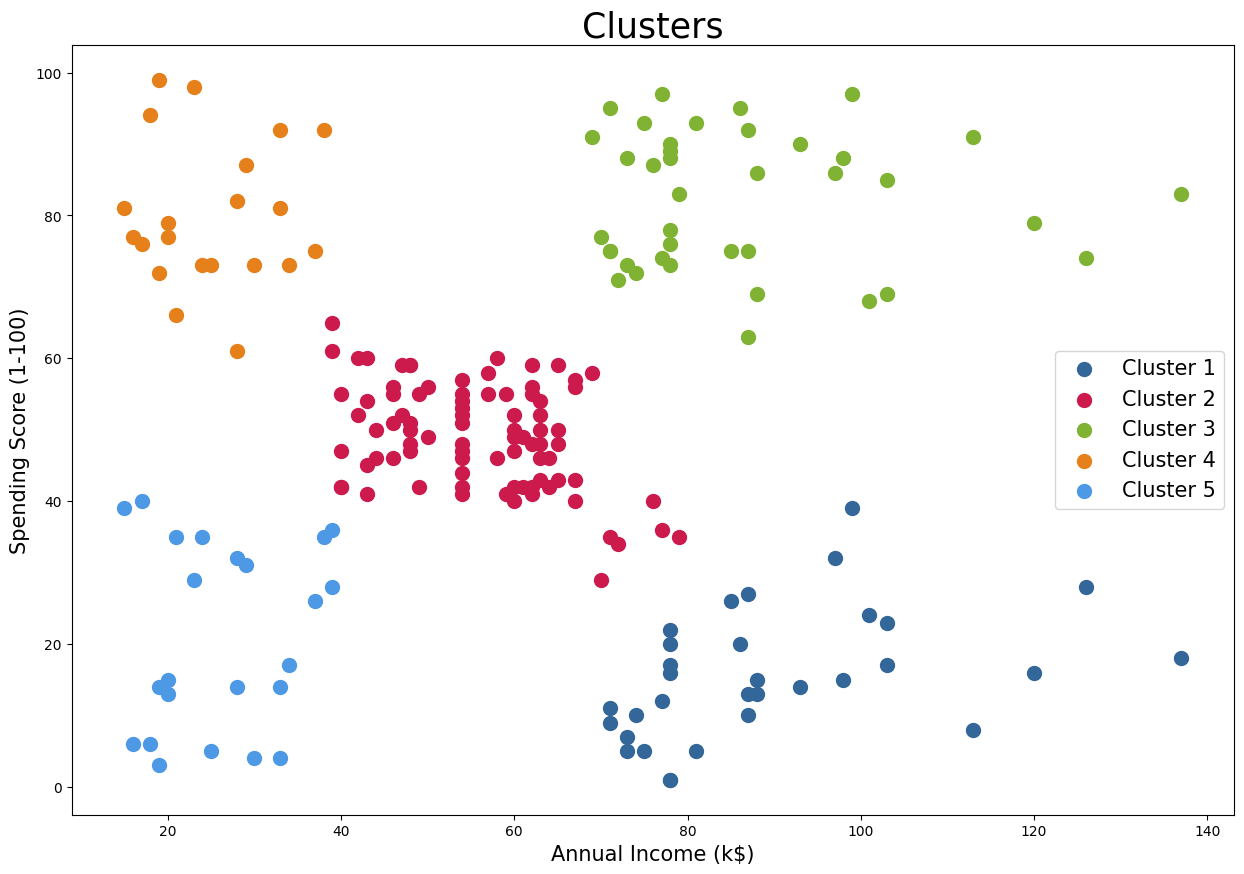

In [14]:

# plot scatter number = 5

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5)
y_hie_pred = hc.fit_predict(x)

plt.figure(figsize = (15,10))
colorArray = [
    (0.2, 0.4, 0.6),
    (0.8, 0.1, 0.3),
    (0.5, 0.7, 0.2),
    (0.9, 0.5, 0.1),
    (0.3, 0.6, 0.9),
    (0.7, 0.2, 0.8),
    (0.1, 0.9, 0.4),
    (0.4, 0.8, 0.7),
    (0.6, 0.3, 0.5),
    (0.2, 0.5, 0.8)
]

# Print the extended colorArray
print(colorArray)

for i in range(5):
  plt.scatter(x[y_hie_pred == i, 0], x[y_hie_pred == i, 1], s = 100, c = colorArray[i], label = f'Cluster {i+1}')

plt.title('Clusters (n=5)', fontsize = 25)
plt.xlabel('Annual Income (k$)', fontsize = 15)
plt.ylabel('Spending Score (1-100)', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()


[(0.2, 0.4, 0.6), (0.8, 0.1, 0.3), (0.5, 0.7, 0.2), (0.9, 0.5, 0.1), (0.3, 0.6, 0.9), (0.7, 0.2, 0.8), (0.1, 0.9, 0.4), (0.4, 0.8, 0.7), (0.6, 0.3, 0.5), (0.2, 0.5, 0.8)]


<ipython-input-15-a99e6e214005>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x[y_hie_pred == i, 0], x[y_hie_pred == i, 1], s = 100, c = colorArray[i], label = f'Cluster {i+1}')


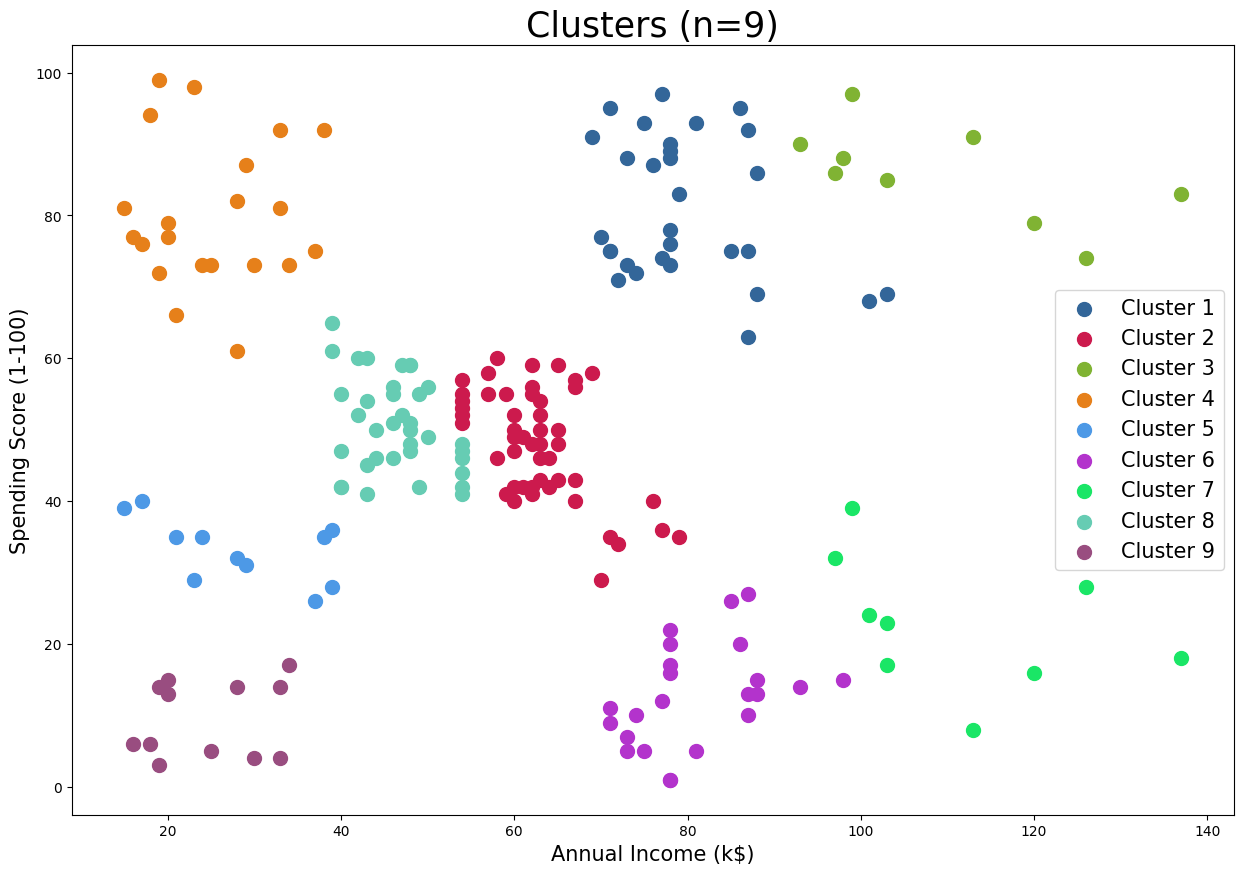

In [15]:

# plot scatter number = 9

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 9)
y_hie_pred = hc.fit_predict(x)

plt.figure(figsize = (15,10))
colorArray = [
    (0.2, 0.4, 0.6),
    (0.8, 0.1, 0.3),
    (0.5, 0.7, 0.2),
    (0.9, 0.5, 0.1),
    (0.3, 0.6, 0.9),
    (0.7, 0.2, 0.8),
    (0.1, 0.9, 0.4),
    (0.4, 0.8, 0.7),
    (0.6, 0.3, 0.5),
    (0.2, 0.5, 0.8)
]

# Print the extended colorArray
print(colorArray)

for i in range(9):
  plt.scatter(x[y_hie_pred == i, 0], x[y_hie_pred == i, 1], s = 100, c = colorArray[i], label = f'Cluster {i+1}')

plt.title('Clusters (n=9)', fontsize = 25)
plt.xlabel('Annual Income (k$)', fontsize = 15)
plt.ylabel('Spending Score (1-100)', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()